# Lending Club Case Study
A consumer finance company that specialises in providing urban customers with various forms of loans. When a company receives a loan application, it must decide whether or not to approve the loan based on the applicant's profile. The bank's decision is related with two sorts of risks:

If the applicant is likely to repay the loan, the company will lose business if the loan is not approved.

Approving the loan may result in a financial loss for the company if the applicant is unlikely to repay the loan, i.e. if he or she is likely to default.

The data pertains to previous loan applicants and whether or not they 'defaulted.' The goal is to find patterns that can be used to make decisions.

### Business Problem
This firm is the world's largest online loan marketplace, allowing personal loans, commercial loans, and medical procedure funding. Through a quick internet interface, borrowers can readily acquire cheaper interest rate loans.

Lending to 'risky' applicants, like most other lending organisations, is the most common source of financial loss (called credit loss). The amount of money lost by the lender when a borrower refuses to pay or flees with the money owed is referred to as credit loss. In other words, defaulting borrowers do the most financial harm to lenders. The 'defaulters' are the consumers who have been labelled as 'charged-off.'

If these problematic loan applicants can be identified, the size of the loan can be reduced, reducing the amount of credit loss.

The goal of this case study is to identify such applications using EDA.

In other words, the organisation needs to know the reasons (or driver variables) that cause loan default, i.e. the variables that are significant predictors of default. This knowledge can be used to the company's portfolio and risk assessment.

To gain a better understanding of the field, you should perform some independent study on risk analytics.

# Process flow diagram

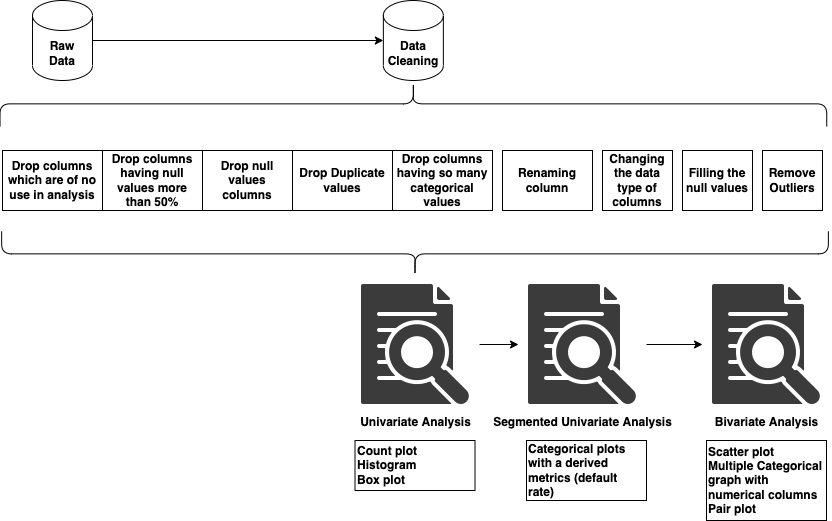

# Importing the libraries

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

# Loading the data set

In [15]:
loan = pd.read_csv("loan.csv",low_memory=False)

# A look at the data

In [16]:
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


# Summary of the data

In [17]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [18]:
loan.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,...,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,...,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,...,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,NaN,NaN,NaN,NaN,2.000000,0.0,NaN,NaN,NaN,NaN


In [19]:
loan.describe(include=['object'])

,term,int_rate,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,loan_status,...,title,zip_code,addr_state,earliest_cr_line,revol_util,initial_list_status,last_pymnt_d,next_pymnt_d,last_credit_pull_d,application_type
count,39717,39717,39717,39717,37258,38642,39717,39717,39717,39717,...,39706,39717,39717,39717,39667,39717,39646,1140,39715,39717
unique,2,371,7,35,28820,11,5,3,55,3,...,19615,823,50,526,1089,1,101,2,106,1
top,36 months,10.99%,B,B3,US Army,10+ years,RENT,Not Verified,01/12/11,Fully Paid,...,Debt Consolidation,100xx,CA,Nov-98,0%,f,May-16,Jun-16,May-16,INDIVIDUAL
freq,29096,956,12020,2917,134,8879,18899,16921,2260,32950,...,2184,597,7099,370,977,39717,1256,1125,10308,39717


In [20]:
loan.shape

(39717, 111)

### From the above summary data we can observe that 
1. There are a total of 111 columns and 39717 rows.
2. There are so many null values in multiple columns.

# Data Cleaning

## 1. Dropping the columns having Null or 0 values.

In [21]:
loan.drop(['collections_12_mths_ex_med', 'mths_since_last_major_derog', 'tax_liens', 'tot_hi_cred_lim', 
           'total_bal_ex_mort', 'total_bc_limit', 'total_il_high_credit_limit', 'annual_inc_joint', 'dti_joint', 
           'verification_status_joint', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 
           'open_il_6m', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 
           'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 
           'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 
           'chargeoff_within_12_mths', 'delinq_amnt', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 
           'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq', 
           'mths_since_recent_inq', 'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd', 'num_actv_bc_tl', 
           'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 
           'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m', 
           'num_tl_op_past_12m', 'pct_tl_nvr_dlq', 'percent_bc_gt_75'], axis=1, inplace=True)


In [22]:
#This 1 line can also be used to delete all the null columns.
#loan.dropna(axis=1, how="all", thresh=None, subset=None, inplace=True)

## 2. Dropping columns having single value.
### The columns will be of no use if all the values will be same in the column.

In [23]:
loan.drop(['application_type', 'policy_code', 'initial_list_status', 'pymnt_plan'], axis=1, inplace=True)

## 3. Dropping columns having null values or 0 more that 40-50%.

In [24]:
loan.drop(['mths_since_last_delinq', 'mths_since_last_record', 'out_prncp', 'out_prncp_inv', 
           'collection_recovery_fee', 'total_rec_late_fee', 'recoveries', 'next_pymnt_d', 'pub_rec_bankruptcies',
          'delinq_2yrs'], axis=1, inplace=True)

## 4. Dropping columns having so many categorical values.
### Columns like id, member id, etc. which can't help us in finding the insights.

In [25]:
loan.drop(['dti', 'id', 'member_id', 'emp_title', 'desc', 'url', 'title', 'zip_code'], axis=1, inplace=True)

## 5. Dropping duplicate columns.
### Deleted columns funded_amnt becasue it is same as loan amount

In [26]:
loan_corr = loan.corr()

#### Heatmap

<AxesSubplot:>

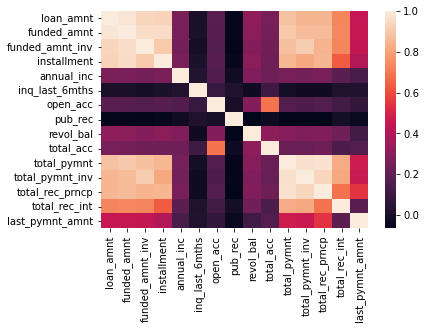

In [27]:
sns.heatmap(loan_corr)

#### Scatter plot

<AxesSubplot:xlabel='funded_amnt', ylabel='loan_amnt'>

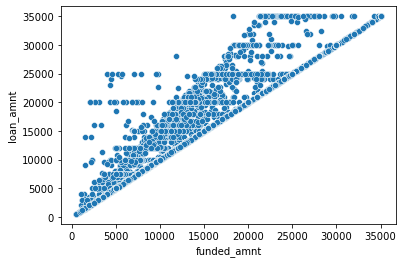

In [28]:
sns.scatterplot(y = loan.loan_amnt,x = loan.funded_amnt)


### As we cas clearly see in the heatmap loan amount and funded amount are highly correlated with each other.

In [29]:
loan.drop(['funded_amnt'], axis=1, inplace=True)

## 6. Dropping the columns which are of no use for the analysis.

Columns which are of no use as they are the columns used after the loan is approved.
We can ignore them, our objective is to know about factors which contirbuted for the loan default.


In [30]:
loan.drop(["total_pymnt", "total_rec_prncp", "total_rec_int", "total_pymnt", "total_rec_int", 
           "total_rec_prncp", "last_pymnt_amnt" ], axis = 1, inplace = True)

In [31]:
loan = loan.iloc[:,:15]

In [32]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_amnt            39717 non-null  int64  
 1   funded_amnt_inv      39717 non-null  float64
 2   term                 39717 non-null  object 
 3   int_rate             39717 non-null  object 
 4   installment          39717 non-null  float64
 5   grade                39717 non-null  object 
 6   sub_grade            39717 non-null  object 
 7   emp_length           38642 non-null  object 
 8   home_ownership       39717 non-null  object 
 9   annual_inc           39717 non-null  float64
 10  verification_status  39717 non-null  object 
 11  issue_d              39717 non-null  object 
 12  loan_status          39717 non-null  object 
 13  purpose              39717 non-null  object 
 14  addr_state           39717 non-null  object 
dtypes: float64(3), int64(1), object(11)


## Renaming the columns.

In [33]:
loan.rename(columns = {'loan_amnt':'loan_amount', 'funded_amnt_inv':'funded_amount_investment',
                              'emp_length':'employment_length', 'int_rate':'interest_rate', 'annual_inc':'annual_income'
                      , 'issue_d':'issue_date', 'addr_state':'address_state'}, inplace = True)

## Checking for Null values.

<AxesSubplot:>

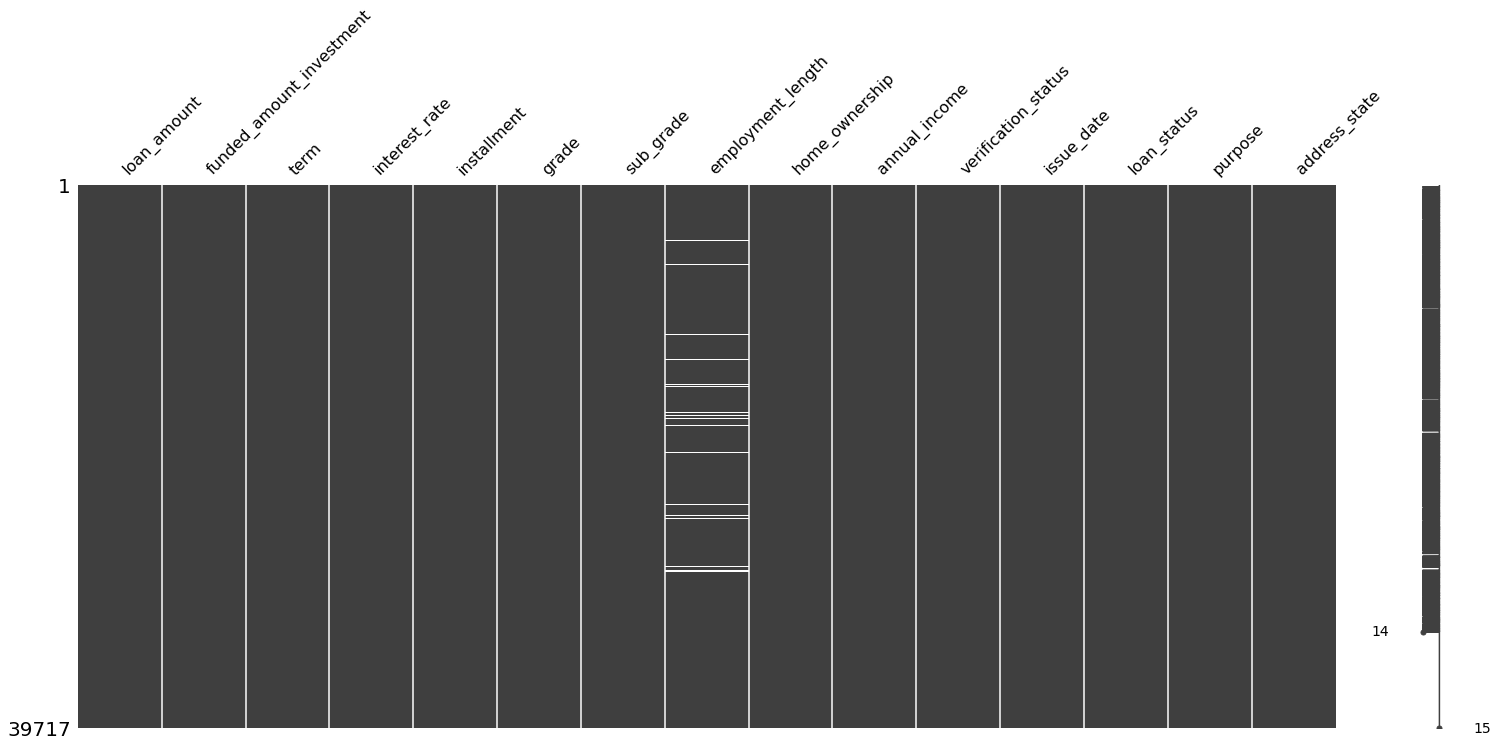

In [34]:
msno.matrix(loan)

In [35]:
loan.isnull().sum()

loan_amount                    0
funded_amount_investment       0
term                           0
interest_rate                  0
installment                    0
grade                          0
sub_grade                      0
employment_length           1075
home_ownership                 0
annual_income                  0
verification_status            0
issue_date                     0
loan_status                    0
purpose                        0
address_state                  0
dtype: int64

## Fixing the Null value issue.

In [36]:
loan["employment_length"].value_counts()

10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: employment_length, dtype: int64

### What % of values are missing in the employment length column?

In [37]:
print((loan["employment_length"].isnull().sum()/loan["employment_length"].count())*100,"%")

2.7819471041871537 %


### Replacing all the null values in the employment length column with "Not Mentioned" as we do not have any concrete reason to replace it with any other label.

In [38]:
loan.fillna({'employment_length': 'Not Mentioned'}, inplace=True)

## Checking the data type of the columns.

In [39]:
loan.dtypes

loan_amount                   int64
funded_amount_investment    float64
term                         object
interest_rate                object
installment                 float64
grade                        object
sub_grade                    object
employment_length            object
home_ownership               object
annual_income               float64
verification_status          object
issue_date                   object
loan_status                  object
purpose                      object
address_state                object
dtype: object

## Correcting the data type of the columns.

### 1. Interest rate should be of integer data type

In [40]:
# Split int_rate on "%"
loan[['int_rate-split-0-whu1', 'int_rate-split-1-whu1']] = loan['interest_rate'].str.split('%', -1, expand=True)
loan = loan[loan.columns[:7].tolist() + ['int_rate-split-0-whu1', 'int_rate-split-1-whu1'] + loan.columns[7:-2].tolist()]

# Deleted columns int_rate-split-1-whu1 & interest_rate
loan.drop(['int_rate-split-1-whu1','interest_rate'], axis=1, inplace=True)

# Changed int_rate-split-0-whu1 to dtype float
loan = loan.astype({"int_rate-split-0-whu1": float})

# Renamed columns interest_rate
loan.rename(columns={'int_rate-split-0-whu1': 'interest_rate'}, inplace=True)

### 2. Issue date should be of date data type

In [41]:
#convert column with object to date time
loan['issue_date'] = pd.to_datetime(loan['issue_date'], errors = 'coerce')

In [42]:
loan.dtypes

loan_amount                          int64
funded_amount_investment           float64
term                                object
installment                        float64
grade                               object
sub_grade                           object
interest_rate                      float64
employment_length                   object
home_ownership                      object
annual_income                      float64
verification_status                 object
issue_date                  datetime64[ns]
loan_status                         object
purpose                             object
address_state                       object
dtype: object

In [43]:
loan.issue_date.head()

0   2011-01-12
1   2011-01-12
2   2011-01-12
3   2011-01-12
4   2011-01-12
Name: issue_date, dtype: datetime64[ns]

# Univariate Analysis and Segmented Analysis

## Checking for the outliers

### This are the only columns for which we need to check the outliers.

In [44]:
check_outliers = ["loan_amount","annual_income","installment","interest_rate"]

#### Creating the box plots of all numerical variables.

In [45]:
#Commenting the code as the file is going greater than 100 mb. To run the code remove the double quotes.
"""
for i in check_outliers:
    #Creating box plot
    print(i)
    fig = px.box(loan, x='loan_status', y = i, color='loan_status')
    fig.update_layout(
        title='Box Plot of'+ " " + i, 
        xaxis = dict(
            rangeslider = dict(
                visible=True, 
                thickness=0.05
            )
        ), 
        yaxis = dict(

        ), 
        barmode='stack', 
        paper_bgcolor='#FFFFFF', 
        showlegend=True
    )
    fig.show(renderer="iframe")
"""

'\nfor i in check_outliers:\n    #Creating box plot\n    print(i)\n    fig = px.box(loan, x=\'loan_status\', y = i, color=\'loan_status\')\n    fig.update_layout(\n        title=\'Box Plot of\'+ " " + i, \n        xaxis = dict(\n            rangeslider = dict(\n                visible=True, \n                thickness=0.05\n            )\n        ), \n        yaxis = dict(\n\n        ), \n        barmode=\'stack\', \n        paper_bgcolor=\'#FFFFFF\', \n        showlegend=True\n    )\n    fig.show(renderer="iframe")\n'

#### Creating histograms of all numerical variable.

In [46]:
#Commenting the code as the file is going greater than 100 mb. To run the code remove the double quotes.
"""
for j in check_outliers:
    fig = px.histogram(loan, x= j, color='loan_status')
    fig.update_layout(
        title='Histogram of' + " " + i, 
        xaxis = dict(
            rangeslider = dict(
                visible=True, 
                thickness=0.05
            )
        ), 
        yaxis = dict(

        ), 
        barmode='group', 
        paper_bgcolor='#FFFFFF', 
        showlegend=True
    )
    fig.show(renderer="iframe")
"""

'\nfor j in check_outliers:\n    fig = px.histogram(loan, x= j, color=\'loan_status\')\n    fig.update_layout(\n        title=\'Histogram of\' + " " + i, \n        xaxis = dict(\n            rangeslider = dict(\n                visible=True, \n                thickness=0.05\n            )\n        ), \n        yaxis = dict(\n\n        ), \n        barmode=\'group\', \n        paper_bgcolor=\'#FFFFFF\', \n        showlegend=True\n    )\n    fig.show(renderer="iframe")\n'

## Fixing the outliers

### As we can clearly see in the graphs above there are number of outliers for column annual income and particularly for the case of loan status = charged off (defaulters) the annual salary is not greater than 132k so we need to consider only those data whose salary is below or equal to 132k.

In [47]:
loan.annual_income.quantile([0.50,0.75,0.80,0.85,0.90, 0.95, 0.96, 0.97, 0.98, 0.98, 0.99])

0.50     59000.00
0.75     82300.00
0.80     90000.00
0.85    100000.00
0.90    116000.00
0.95    142000.00
0.96    150000.00
0.97    165757.92
0.98    187000.00
0.98    187000.00
0.99    234999.36
Name: annual_income, dtype: float64

In [48]:
loan = loan[loan.annual_income <= 132000]

In [49]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37254 entries, 0 to 39716
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   loan_amount               37254 non-null  int64         
 1   funded_amount_investment  37254 non-null  float64       
 2   term                      37254 non-null  object        
 3   installment               37254 non-null  float64       
 4   grade                     37254 non-null  object        
 5   sub_grade                 37254 non-null  object        
 6   interest_rate             37254 non-null  float64       
 7   employment_length         37254 non-null  object        
 8   home_ownership            37254 non-null  object        
 9   annual_income             37254 non-null  float64       
 10  verification_status       37254 non-null  object        
 11  issue_date                37254 non-null  datetime64[ns]
 12  loan_status       

In [50]:
cat_variables = ["loan_status","term","grade","sub_grade","employment_length",
                 "home_ownership","verification_status","purpose","address_state"]

#### Creating count plot for all categorical variables.

In [51]:
#Commenting the code as the file is going greater than 100 mb. To run the code remove the double quotes.
"""
for i in cat_variables:
    fig = px.histogram(loan, x=i)
    fig.update_layout(
        title=i + " " + 'histogram', 
        xaxis = dict(
            rangeslider = dict(
                visible=True, 
                thickness=0.05
            )
        ), 
        yaxis = dict(

        ), 
        barmode='group', 
        paper_bgcolor='#FFFFFF', 
        showlegend=True
    )
    fig.show(renderer="iframe")
"""

'\nfor i in cat_variables:\n    fig = px.histogram(loan, x=i)\n    fig.update_layout(\n        title=i + " " + \'histogram\', \n        xaxis = dict(\n            rangeslider = dict(\n                visible=True, \n                thickness=0.05\n            )\n        ), \n        yaxis = dict(\n\n        ), \n        barmode=\'group\', \n        paper_bgcolor=\'#FFFFFF\', \n        showlegend=True\n    )\n    fig.show(renderer="iframe")\n'

#### Creating count plot of the numerical variables by creating the bins.

Text(0.5, 0, 'Interest Rate')

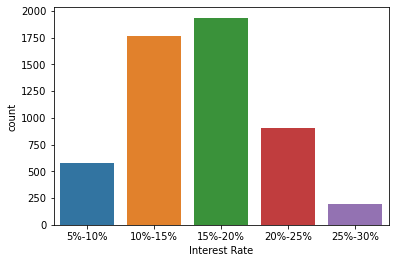

In [52]:
loan['int_rate_groups'] = pd.cut(loan['interest_rate'], bins=5,precision =0,labels=['5%-10%','10%-15%','15%-20%','20%-25%','25%-30%'])
sns.countplot(x='int_rate_groups', data=loan[loan.loan_status == 'Charged Off'])
plt.xlabel('Interest Rate')

<AxesSubplot:xlabel='loan_amnt_grps', ylabel='count'>

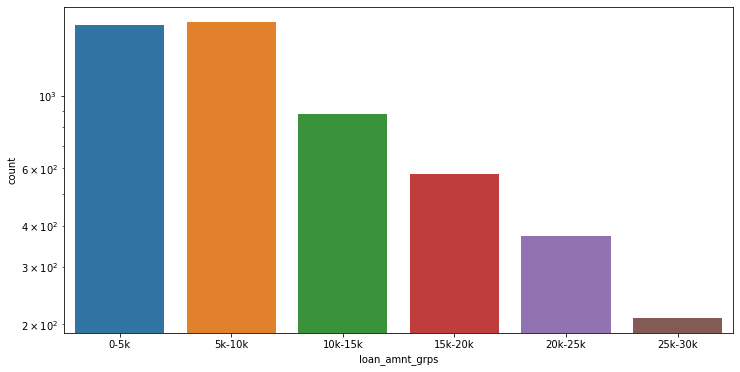

In [53]:
loan['loan_amnt_grps'] = pd.cut(loan['loan_amount'], bins=6,precision =0,labels=['0-5k','5k-10k','10k-15k','15k-20k','20k-25k','25k-30k'])
fig,ax = plt.subplots(figsize = (12,6))
ax.set_yscale('log')
sns.countplot(x='loan_amnt_grps', data=loan[loan['loan_status']=='Charged Off'])

### > Rate of interest
### 1. The most number of defaulters count are from one having interest rate between 15-20%.
### 2. But the defulters are most likely to be the one having the interest rate between 20-23% as the average rate of defaulters is the highest for this range.
### > Loan Amount
### 1. The most number of defaulters count are from one applying loan for amount range from 1-10k.
### 2. But the defaulters are most likely to be the one applying loan for amount range from 26-28k the average defaulters rate is around 25%.

## Comparison of categorical columns with the count of defaulters and the rate of defaulters.
### 1. Count of defaulters can be high for any category as the number of loan taken from any category is high.
### 2. Finding rate is needed as analysing only the count will not give us the correct insights.
### 3. For every graph we had created a derived coulmn 'Default_rate' which give calculate the rate of defaulters.

In [54]:
(loan.loan_status.value_counts() / len(loan)) * 100

Fully Paid     82.809900
Charged Off    14.406507
Current         2.783594
Name: loan_status, dtype: float64

#### Creating the count and default rate(derived metric) plot of all categorical values.

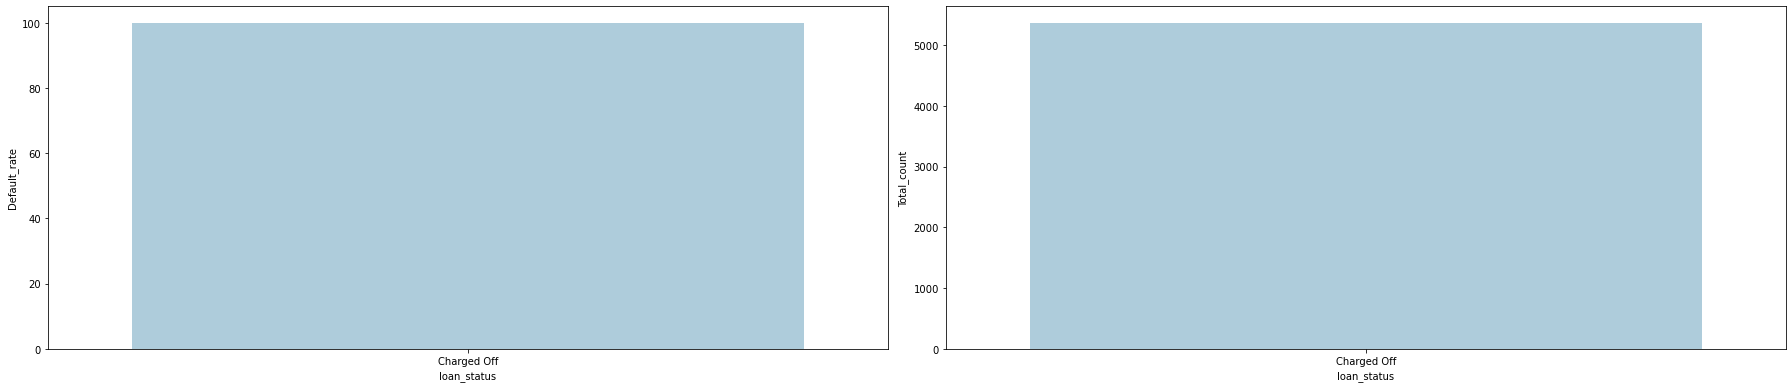

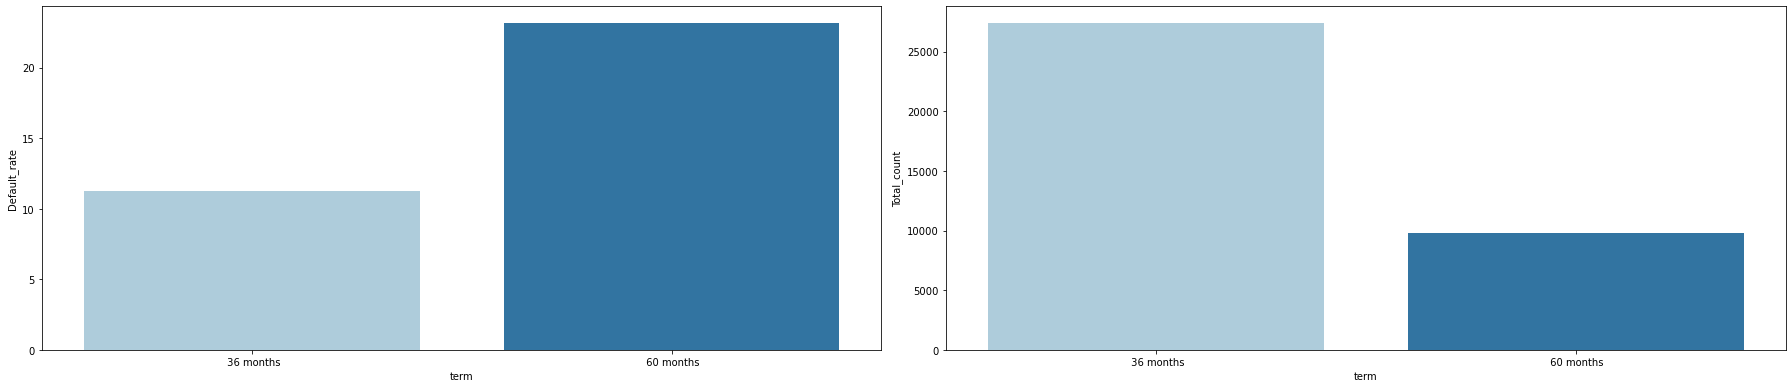

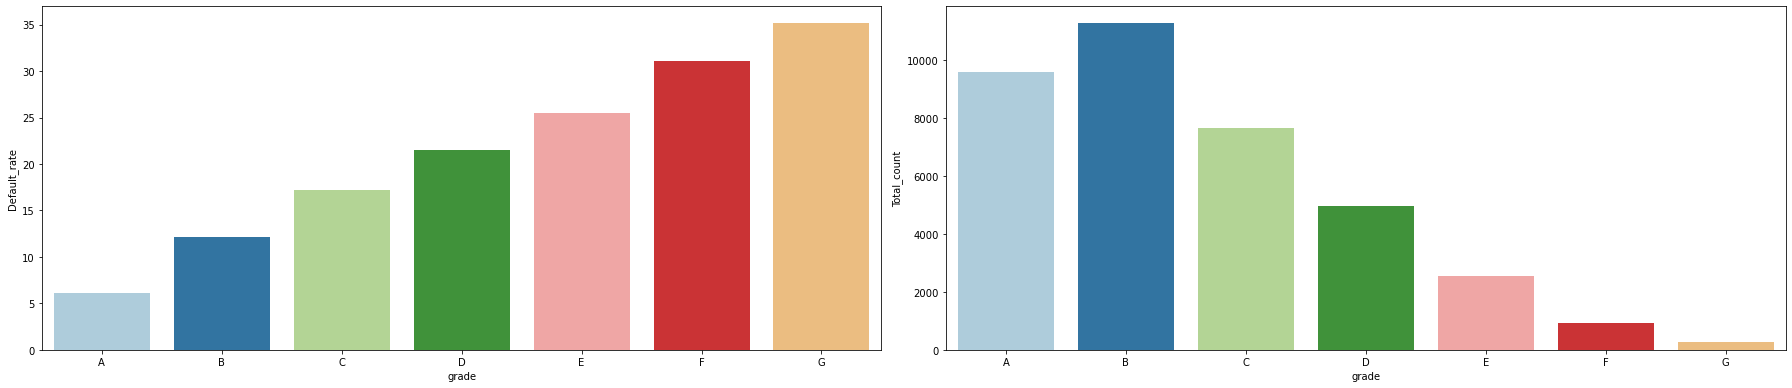

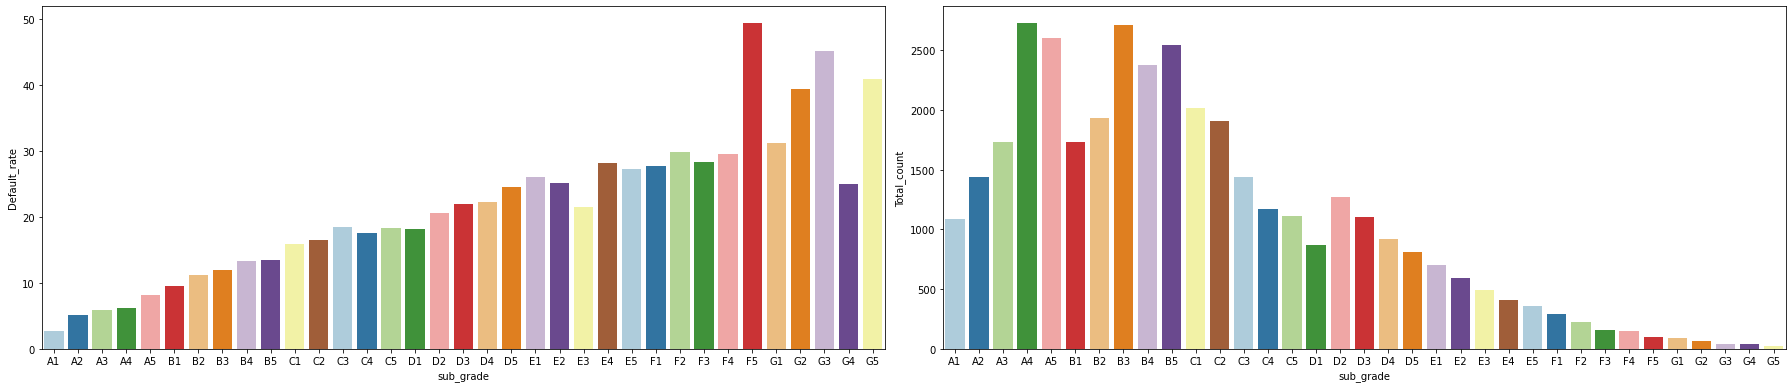

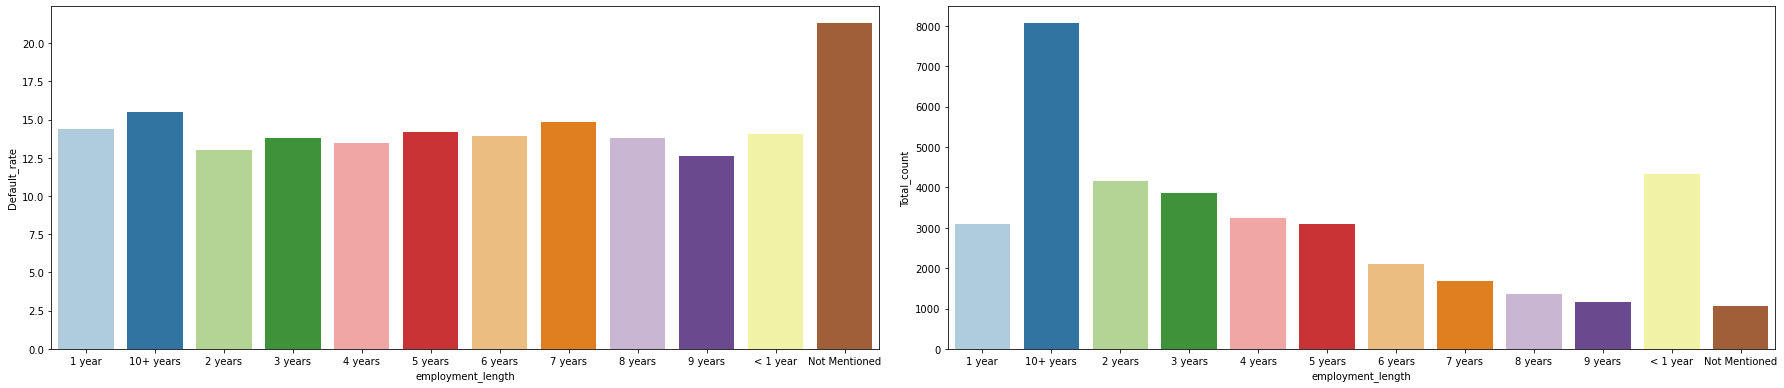

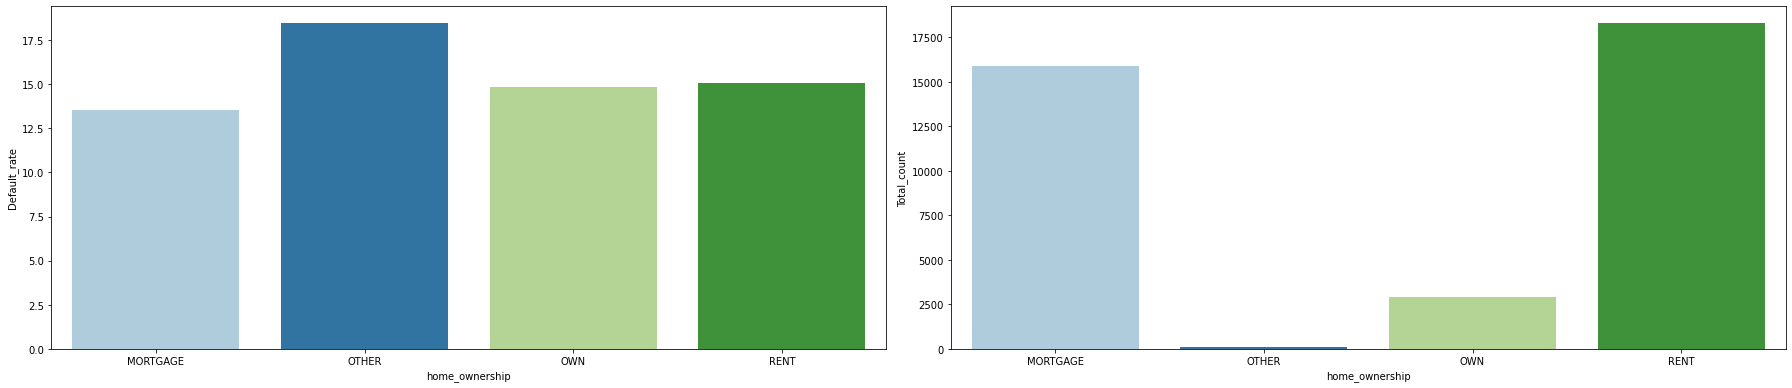

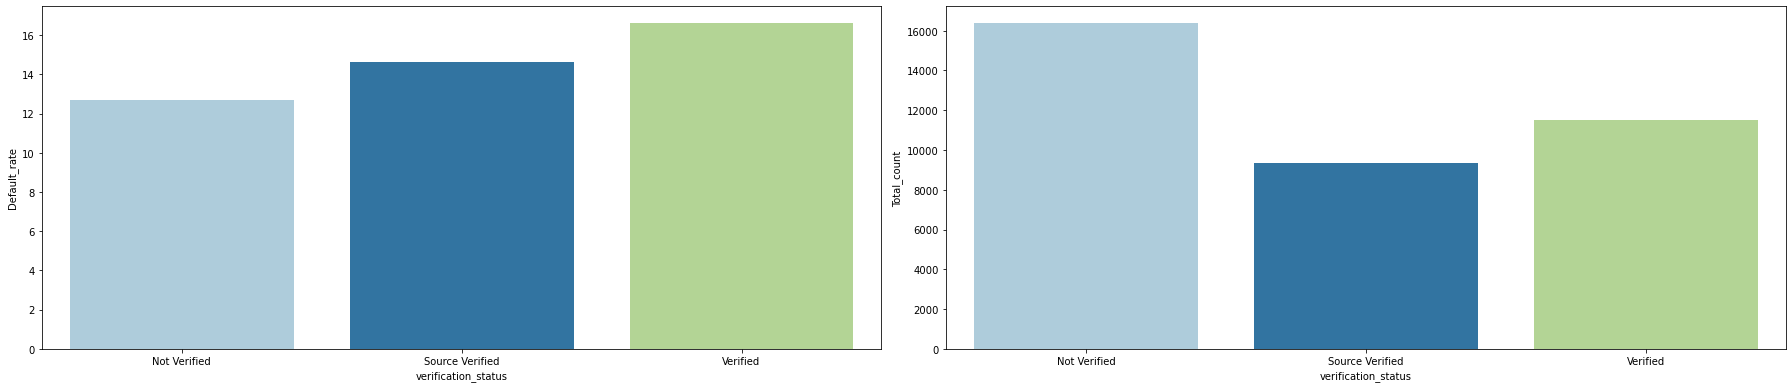

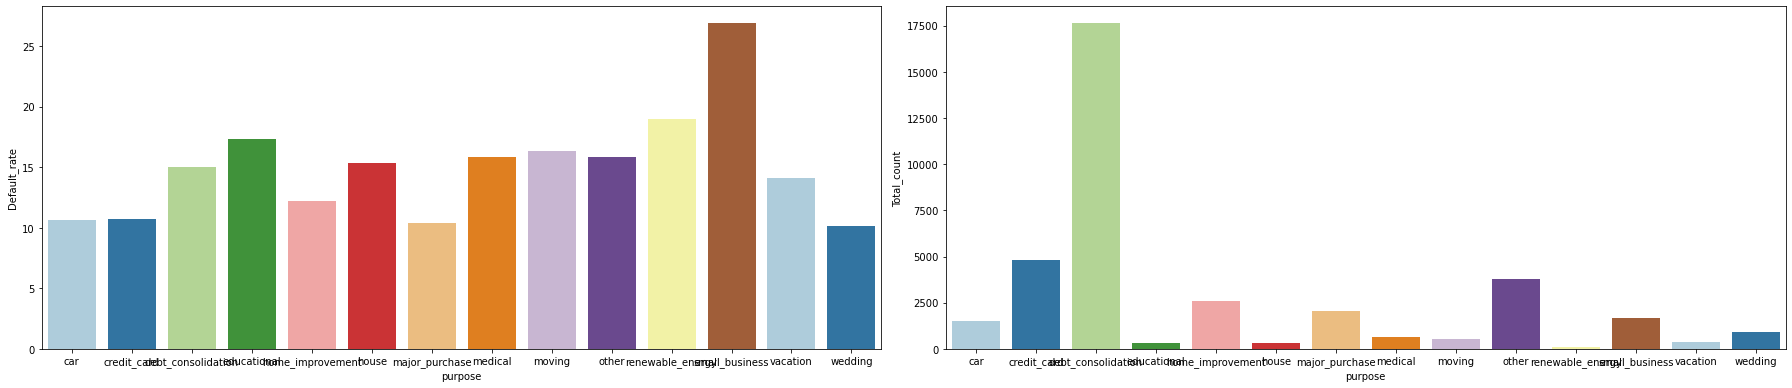

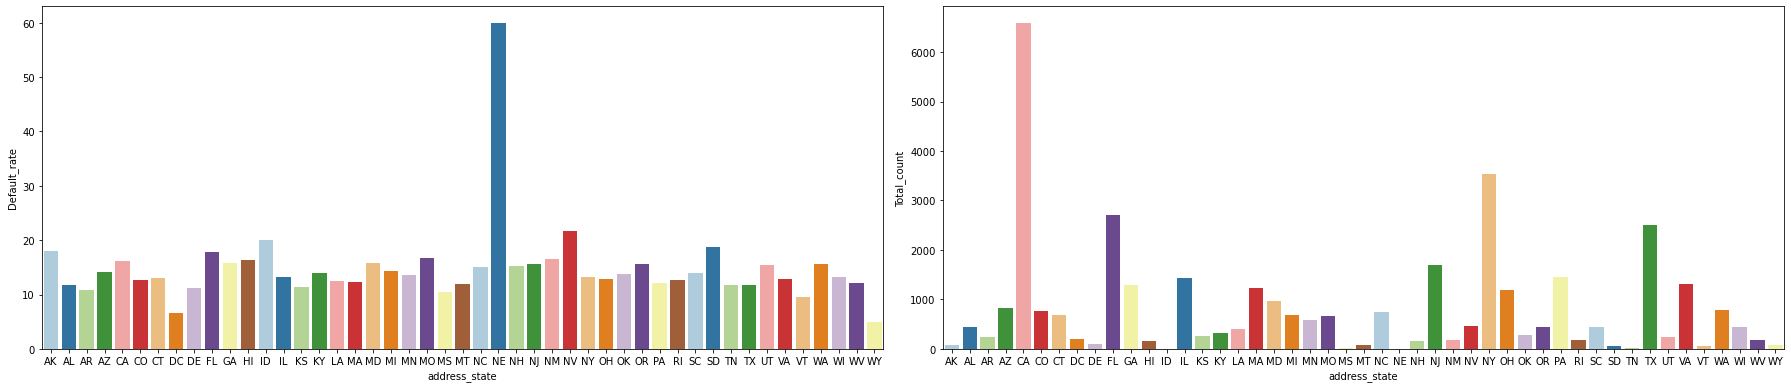

In [55]:
for i in cat_variables:
    loan_charged_off = loan.query("loan_status == 'Charged Off'")
    
    b = loan_charged_off.filter([i])
    b['Count'] = 1
    group_1 = b.groupby(i).sum()
    
    c = loan.filter([i])
    c['Total_count'] = 1
    group_2 = c.groupby(i).sum()
    df_cd = pd.merge(group_1, group_2, how='inner', left_on = i, right_on = i)
    
    df_cd['Default_rate'] = (df_cd['Count']/df_cd['Total_count'])*100
    
    plt.rcParams["figure.figsize"] = [25.00, 5.50]
    plt.rcParams["figure.autolayout"] = True
    f, axes = plt.subplots(1, 2)
    df = pd.DataFrame(dict(col1=np.linspace(1, 10, 5), col2=np.linspace(1, 10, 5)))
    sns.barplot(x = df_cd.index,y = df_cd['Default_rate'],ax=axes[0],palette='Paired')
    sns.barplot(x = df_cd.index,y = df_cd['Total_count'],ax=axes[1],palette='Paired')
    plt.show()
    
    

## Insights
### Max Defaulters Rate: The rate of defaulters.
### Max Count: The count of number of defaulters.
### 1. Terms
#### Max Count: The most number of defaulters count are from 36 months term.
#### Max Defaulters Rate:  But the defulters are most likely to be the one from 60 months term as the average rate of defaulters is the highest for this 22%.
### 2. Grade
#### Max Count: The most number of defaulters count are from grade B.
#### Max Defaulters Rate:  But the defulters are most likely to be the one from grade G and F as the average rate of defaulters is the highest for this 31%. The rate for F is less if we exclude sub grade F5 because of which the F grade is contributing 30%.
### 3. Sub Grade
#### Max Count: The most number of defaulters count are from Sub grade A4.
#### Max Defaulters Rate:  But the defulters are most likely to be the one from Sub grade F5 as the average rate of defaulters is the highest for this 45%.
### 4. Employment Length
#### Max Count: The most number of defaulters count are one having the length 10+ years.
#### Max Defaulters Rate:  But the defulters are most likely to be the one who haven't mentioned there employment length as the average rate of defaulters is the highest for this 21%.
### 5. Home Ownership
#### Max Count: The most number of defaulters count are from the one who lives on rent.
#### Max Defaulters Rate:  But the defulters are most likely to be the one who mentioned other in there home ownership column as the average rate of defaulters is the highest for this 18%.
### 6. Verification Status
#### Max Count: The most number of defaulters count are from the one who are not verified.
#### Max Defaulters Rate:  But the defulters are most likely to be the one from the one who are verified as the average rate of defaulters is the highest for this 16%. Cannot comment much on it.
### 7. Purpose
#### Max Count: The most number of defaulters count are the one who had taken loan for debt consolidation.
#### Max Defaulters Rate:  But the defulters are most likely to be the one who had taken loan for small businessess as the average rate of defaulters is the highest for this range 25%.
### 8. Address State
#### Max Count: The most number of defaulters count are from state CA.
#### Max Defaulters Rate:  But the defulters are most likely to be the one from state NE as the average rate of defaulters is the highest for this range 60%. This is a big number we have to take this into a serious consideration.

# Bivariate and Extended Segmented Univariate Analysis

#### Creating the count and default rate(derived metric) plot of all categorical values by taking 2 categorical in an account at a time.

In [62]:
cat_variables = ["grade","term","sub_grade","employment_length",
                 "home_ownership","verification_status","purpose","address_state"]
#Commenting the code as the file is going greater than 100 mb. To run the code remove the double quotes.
"""
for i in cat_variables:
    for j in cat_variables:
        if i != j:
            loan_charged_off = loan.query("loan_status == 'Charged Off'")
            b = loan_charged_off.filter([j,i])
            b['Count'] = 1
            group_1 = b.groupby([j,i]).sum()

            c = loan.filter([j,i])
            c['Count_Total'] = 1
            group_2 = c.groupby([j,i]).sum()
            df_cd = pd.merge(group_1, group_2, how='inner', left_on = [j,i], right_on = [j,i])


            df_cd['rate'] = (df_cd['Count']/df_cd['Count_Total'])*100
            df_cd.reset_index(level=0, inplace=True)

            plt.rcParams["figure.figsize"] = [30.00, 15.50]
            plt.rcParams["figure.autolayout"] = True
            f, axes = plt.subplots(1, 2)
            df = pd.DataFrame(dict(col1=np.linspace(1, 10, 5), col2=np.linspace(1, 10, 5)))
            sns.barplot(x = df_cd.index,y = df_cd['rate'],ax=axes[0],hue = df_cd[j])
            sns.barplot(x = df_cd.index,y = df_cd['Count_Total'],ax=axes[1],hue = df_cd[j])
            plt.show()
"""

'\nfor i in cat_variables:\n    for j in cat_variables:\n        if i != j:\n            loan_charged_off = loan.query("loan_status == \'Charged Off\'")\n            b = loan_charged_off.filter([j,i])\n            b[\'Count\'] = 1\n            group_1 = b.groupby([j,i]).sum()\n\n            c = loan.filter([j,i])\n            c[\'Count_Total\'] = 1\n            group_2 = c.groupby([j,i]).sum()\n            df_cd = pd.merge(group_1, group_2, how=\'inner\', left_on = [j,i], right_on = [j,i])\n\n\n            df_cd[\'rate\'] = (df_cd[\'Count\']/df_cd[\'Count_Total\'])*100\n            df_cd.reset_index(level=0, inplace=True)\n\n            plt.rcParams["figure.figsize"] = [30.00, 15.50]\n            plt.rcParams["figure.autolayout"] = True\n            f, axes = plt.subplots(1, 2)\n            df = pd.DataFrame(dict(col1=np.linspace(1, 10, 5), col2=np.linspace(1, 10, 5)))\n            sns.barplot(x = df_cd.index,y = df_cd[\'rate\'],ax=axes[0],hue = df_cd[j])\n            sns.barplot(x = d

In [58]:
continous_variable = ["loan_amount","annual_income","installment","interest_rate"]
cat_variables = ["grade","term","sub_grade","employment_length",
                 "home_ownership","verification_status","purpose","address_state"]

#### Creating scatter plot for all the numerical variables.

In [63]:
#Commenting the code as the file is going greater than 100 mb. To run the code remove the double quotes.
"""
for j in continous_variable:
    for i in continous_variable:
        if i != j:
            sns.scatterplot(y = loan[i],x = loan[j])
            plt.show()
""" 

'\nfor j in continous_variable:\n    for i in continous_variable:\n        if i != j:\n            sns.scatterplot(y = loan[i],x = loan[j])\n            plt.show()\n'

#### Creating scatter plot for all the numerical variable and keeping one categorical column as a differentiator.

In [61]:
#Commenting the code as the file is going greater than 100 mb. To run the code remove the double quotes.
"""
for k in cat_variables:
    for j in continous_variable:
        for i in continous_variable:
            if i != j:
                sns.scatterplot(y = loan[i],x = loan[j],hue = loan[k])
                plt.show()
"""

'\nfor k in cat_variables:\n    for j in continous_variable:\n        for i in continous_variable:\n            if i != j:\n                sns.scatterplot(y = loan[i],x = loan[j],hue = loan[k])\n                plt.show()\n'

#### Paire plot.

In [ ]:
sns.pairplot(loan)

#### Pair plot as keeping the target ''loan status" as hue.

In [ ]:
sns.pairplot(loan,hue ='loan_status')

## Insights
### 1. Home Ownership & Purpose
### The default rate of all the purposes is equaly distributed for one who owns, mortgage and rent the home.
### In the case where the people had filled other in home ownership are likely to be defaulters but specifically for purposes like  education, home, major-purchase, medical, renewable enery & wedding are giving zero defaulters and maximum we are getting defaulter for the purpose moving i:e 100%.
### 2. Grade & Employment length
### A grade people are the highest who haven't mentioned there employment length.
### There are 100% defaulters who haven't mentioned there employment length.
### 3. Grade & Sub grade
### G & F grade people are the one with highest default rate. F comes in the list of highest default rate because of the F5 sub grade as it is having the highest default rate of 45% increasing the overall default rate in F grade.
### 4. Grade & Purpose
### Highest default rate is from the one who had taken loan for opening small businesses and mostly high grade people take loan for this purposes. Midiocar grade people take loan for purposes like education and house.
### 5. Interest rate & grade
### It has been seen that loan are provided at high interests to low grade people as compared to the high grade people.
### 6. Address state, Verification status & Terms
### In NE state no one has a verified status and this state has the highest rate of defaulters and all had taken loan for 36 terms.
### 7. Address state & Home ownership
### PA, MO, AR are major states where people had filled home ownership = other and from our analysis we know that the one who had filled home owneship as other are most likely to be defaulters.
### 8. Issue date & Grade
### The rate of defaulters for grade A has been decreased in a span from 2007 to 2011 and the number of A grade people taking loan has been increased.
### There is much more raise in defaulters for grade C & E as compared to the number of people taking loans.


# Recommendations
### 1. Interest rate increases as per the grade. May be this is one of the reason for the increase in the defaulters in the grade G as the interest rate is highest for this grade 20-25%. We need to reconsider the rate of interest according to some different factors not by the grades.
### 2. There should be through analysis of the people who are applying loans for opening small business. The background check is usually be done but we also need to do the detail analysis of the business plans which the one is asking loan for because from our analysis mostly defaulters belongs to this category and from our bivariate analysis we can clearly see that mostly high grade people apply for this type of loan so majoritly there backgroud is great but not there plans for the business which ultimatly leads to the loss.
### 3. It should be strict to mention there employment lenght as most of the defaulters are coming from the one who haven't mentioned there employment length and also a detail background check of there employbility as there can be cases where the show fake employment.
### 4. Either stop or be very carefull before taking any application from the state NE, it has the highest defaulters rate and all apply for only 36 months terms.

# Interesting facts
### 1. For sub grade A1 who has taken loan for 60 months terms are least likely to be defaulters with 0% defaulters.
### 2. For sub grade G3 who has taken loan for 36 months terms are most likely to be defaulters with 100% defaulters.
### 3. For grade G who has not mentioned there employment length are most likely to be defaulters with 100% defaulters.